## Importing Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from fastprogress import progress_bar
from sklearn.metrics import f1_score


## Data Preprocessing 

In [3]:
# Define paths for train, validation, and test sets
train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'
test_dir = 'chest_xray/test'

# Define transformations without any augmentation, only resizing, converting to tensor, and normalizing
common_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 for consistency with model input
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Standard normalization 
])

train_augementation = transforms.Compose ([
    transforms.Resize((224, 224)),  # Resize images to a fixed size
    transforms.RandomRotation(30),  # Randomly rotate images within 30 degrees
    transforms.RandomAffine(0, translate=(0.1, 0.1)),  # Width and height shift (fraction of total size)
    transforms.RandomResizedCrop(224, scale=(0.8, 1.2)),  # Random zoom (analogous to zoom_range)
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip images horizontally
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize using ImageNet values
])

# Load datasets from directories 
train_dataset = datasets.ImageFolder(train_dir, transform=train_augementation)
val_dataset = datasets.ImageFolder(val_dir, transform=common_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=common_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

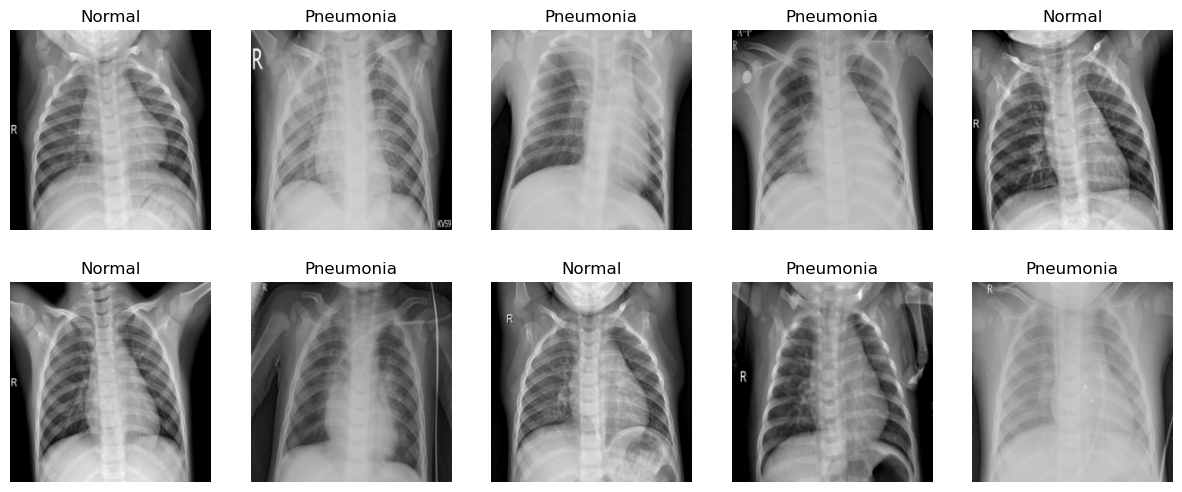

In [12]:
# Get a batch of images from the train_loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Define the number of images to display in the grid
num_images = 10
num_cols = 5  # Number of columns in the grid
num_rows = num_images // num_cols  # Calculate rows based on total images

# Display the images in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))

# Convert images to numpy and display
for i in range(num_images):
    ax = axes[i // num_cols, i % num_cols]
    img = images[i].numpy().transpose((1, 2, 0))  # Convert from Tensor to numpy
    img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Unnormalize
    img = np.clip(img, 0, 1)  # Clip values to keep them between 0 and 1 for display

    ax.imshow(img)
    ax.axis('off')
    ax.set_title("Pneumonia" if labels[i] == 1 else "Normal")

plt.show()


## Training The Model